In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train1.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [3]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [4]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

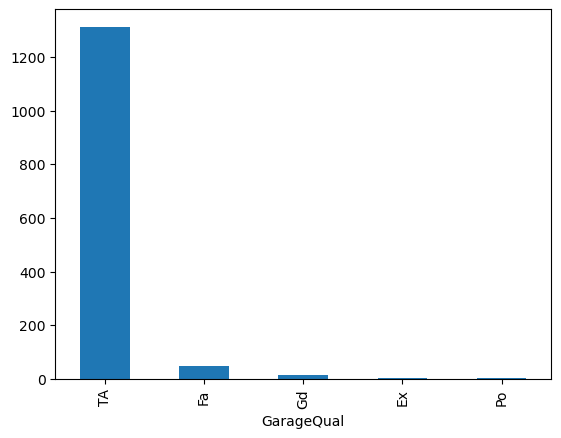

In [5]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()

In [6]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

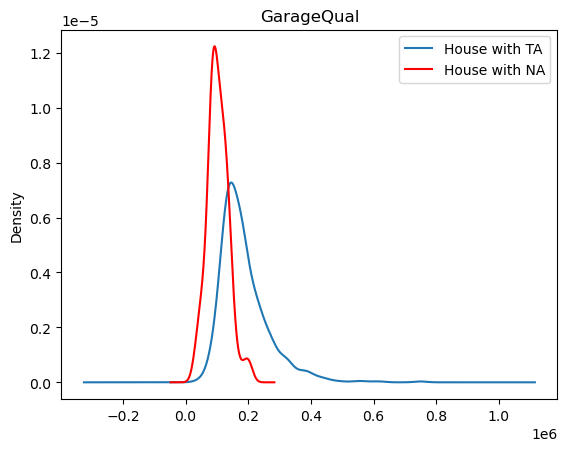

In [7]:
fig=plt.figure()
ax=fig.add_subplot(111)
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
labels=['House with TA','House with NA']
ax.legend(lines,labels,loc='best')
plt.title('GarageQual')

In [8]:
temp=df[df['GarageQual']=='TA']['SalePrice']


In [13]:
df['GarageQual'].fillna('TA', inplace=True)


<Axes: xlabel='GarageQual'>

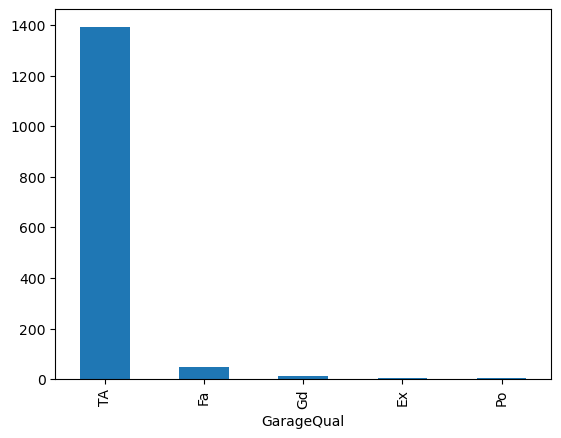

In [14]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

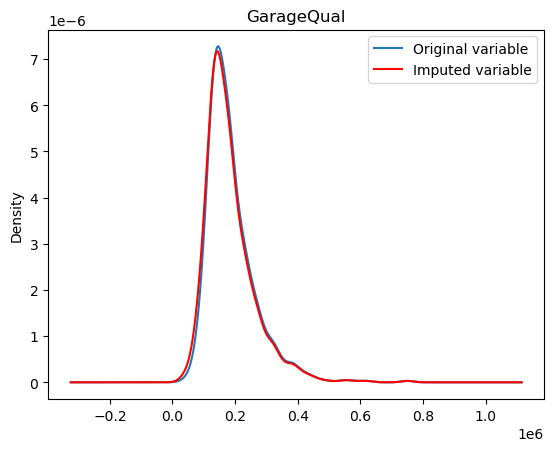

In [15]:
fig=plt.figure()
ax=fig.add_subplot(111)
temp.plot(kind='kde',ax=ax)
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels=ax.get_legend_handles_labels()
labels=['Original variable','Imputed variable']
ax.legend(lines,labels,loc='best')
plt.title('GarageQual')

<Axes: xlabel='FireplaceQu'>

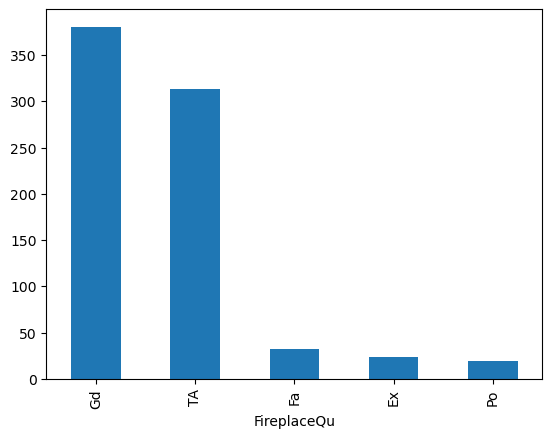

In [18]:
df['FireplaceQu'].value_counts().plot(kind='bar')


In [19]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

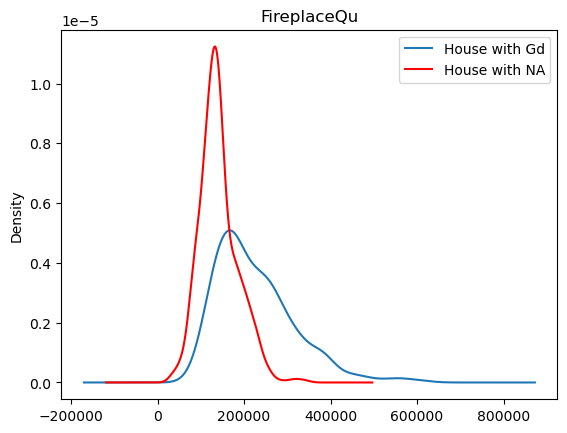

In [22]:
fig=plt.figure()
ax=fig.add_subplot(111)
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
labels=['House with Gd','House with NA']
ax.legend(lines,labels,loc='best')
plt.title('FireplaceQu')

In [24]:
temp=df[df['FireplaceQu']=='Gd']['SalePrice']

In [27]:
df['FireplaceQu'].fillna('Gd',inplace=True)

<Axes: xlabel='FireplaceQu'>

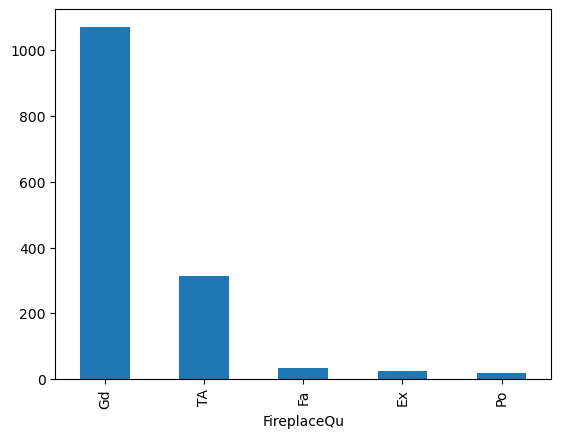

In [28]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

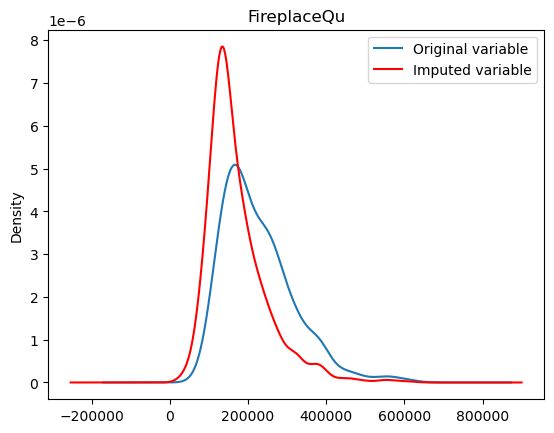

In [29]:
fig=plt.figure()
ax=fig.add_subplot(111)
temp.plot(kind='kde',ax=ax)
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels=ax.get_legend_handles_labels()
labels=['Original variable','Imputed variable']
ax.legend(lines,labels,loc='best')
plt.title('FireplaceQu')

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [32]:
from sklearn.impute import SimpleImputer

In [34]:
imputer=SimpleImputer(strategy='most_frequent')

In [36]:
x_train=imputer.fit_transform(x_train)
x_test=imputer.transform(x_train)

In [37]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)